## Exercise 00 : Line chart


* make a connection to the [database](https://drive.google.com/open?id=1zQ8AR2Ry3ajzB3UZO1Sfk3xtDJlzQF2M) (it is the same as the previous day)
* run a query that gets the datetime from the pageviews table, selecting only the
users and not the admins
* using Pandas, create a new dataframe where the visits are counted and grouped by
date
* using Pandas method .plot(), create a graph
    * the size of the font should be 8
    * the size of the figure is (15,8)
    * the graph must have the title Views per day
    * notice the rotation of xticks on the graph below
* close the connection to the database

In [ ]:
import pandas as pd
import sqlite3
con=sqlite3.connect('data/checking-logs.sqlite')
main_query="""
SELECT  datetime 
FROM pageviews p
WHERE p.uid LIKE "user_%"
"""

pageviews_df=pd.read_sql(main_query, con, parse_dates=['datetime'])
df=pd.DataFrame(pageviews_df.groupby(pageviews_df['datetime'].dt.date).size().reset_index(name='num_of_visits'))
df.rename(columns={'datetime': 'date'}, inplace=True)
df['date']=pd.to_datetime(df['date'])
df







,date,num_of_visits
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


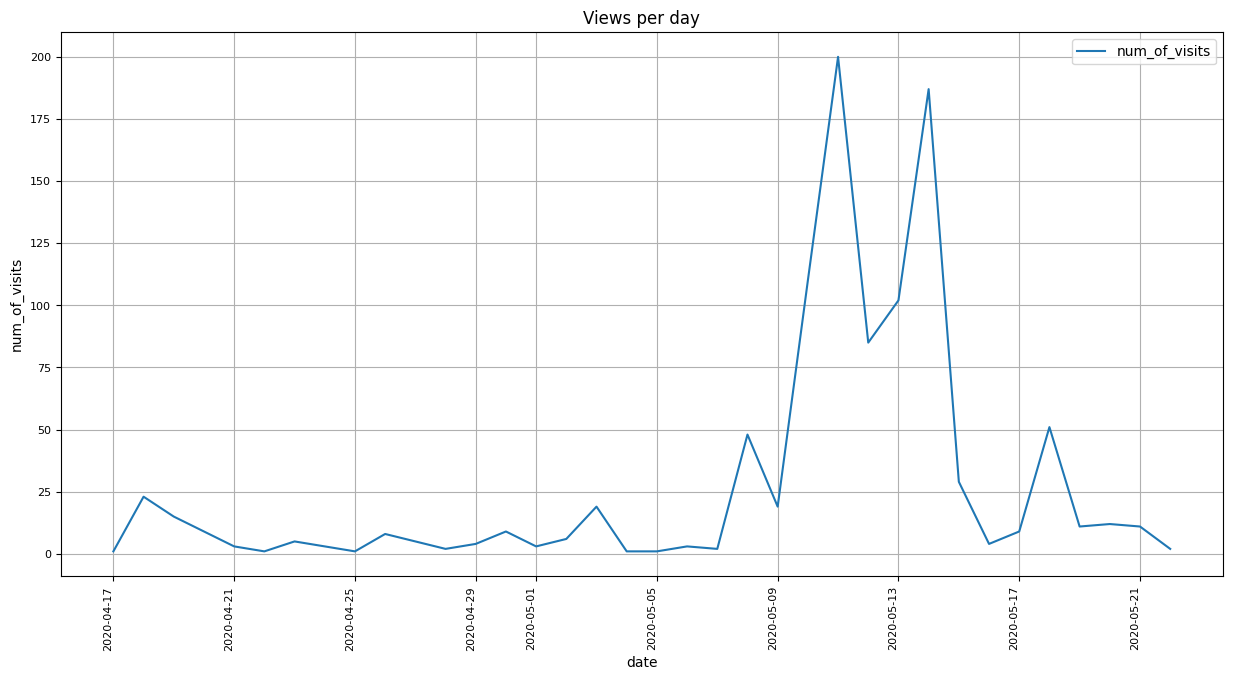

In [46]:
graph=df.plot(fontsize=8, figsize=(15, 8), x='date', y='num_of_visits', rot=90)
graph.set_title('Views per day')
graph.set_xlabel('date')
graph.set_ylabel('num_of_visits')
graph.grid(True)


In [47]:
con.close()